# 2022 COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
* All codes can run linearly and successfully.
* For section 1,2 and 3, they maybe take you about 10 minutes to run all of code.
* For section 4, I have kept one testing code and deleted other testing code. 
* For section 5(Testing part), it will take you about 20 seconds to run it because I have uploaded the model and important files in the Google drive, you just get access to them by the id I give.
* Have Fun(*￣︶￣)

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from torch.utils.data import TensorDataset, DataLoader
import torch

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import numpy as np

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.featstruct import remove_variables
import gensim.downloader as api
from gensim.models import Word2Vec
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('training_data.csv')  

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testing_data.csv')  

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less a

In [ ]:
# Preview of the data in the csv file, which has two columns: 
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head(10)

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...
5,T,'18/37 @.@|||Science is not perfect. No scien...
6,F,"'No, I can't draw on my own nails (haha). Thos..."
7,T,'I tend to build up a collection of things on ...
8,F,"I'm not sure, that's a good question. The dist..."
9,T,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [ ]:
# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

## 1.1. URL Removal
*related to the section 4.2*

In [ ]:
def remove_URL(data):
  res = []
  for i in data:                                  
    x = re.sub(r'\S*https?:\S*', '', i) # removing URL
    res.append(x)
  return res


## In the section 4.2,  we can see that the best preprocessing techniques contain removing URL, punctuation, stopwords and lemmatization.
clean_training1 = remove_URL(training_posts)
clean_testing1 = remove_URL(testing_posts)
print(clean_training1[0])

 and intj moments    sportscenter not top ten plays    pranks|||What has been the most life-changing experience in your      On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~    ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390     ...|||Welcome and   Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by...|||All things in moderation.  Sims is 

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [ ]:
# removing punctuation
def remove_punctuation(data):
  res =  []
  for i in data:
   x = re.sub(r'[^\w\s]','', i)
   x = x.strip()
   res.append(x)
  return res


# removing stopwords and converting lowercase
def remove_stopwords(data):
   stop_words = stopwords.words('english')
   token_sentence = [word_tokenize(sentence) for sentence in data]
   filtered_sentence = []
   for sc in token_sentence:
     filtered_words = []
     for word in sc:
       if not word in stop_words:
         filtered_words.append(word.lower())
     filtered_sentence.append(filtered_words)
   return filtered_sentence


#Lemmatization
def lemmatization(data):
  lemmatizer = WordNetLemmatizer()
  clean_sentence = []
  for tokens in data:
      single_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
      clean_sentence.append(single_sentence)
  return clean_sentence


## In the section 4.2,  we can see that the best preprocessing techniques contain removing URL, punctuation, stopwords and lemmatization.
clean_training2 = remove_punctuation(clean_training1)
clean_training3 = remove_stopwords(clean_training2)
clean_training = lemmatization(clean_training3)

clean_testing2 = remove_punctuation(clean_testing1)
clean_testing3 = remove_stopwords(clean_testing2)
clean_testing = lemmatization(clean_testing3)

data = clean_training + clean_testing



---



# 2 - Input Representation

## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [ ]:
# Preprocess data for word embeddings
## word list
def wordlist(training_data, testing_data):
  training_word_set = set()
  for sentence in training_data:
    for word in sentence:
      training_word_set.add(word)
  test_word_set = set()
  for sentence in testing_data:
    for word in sentence:
      test_word_set.add(word)
  word_set= training_word_set | test_word_set

  word_set.add('[PAD]')
  word_set.add('[UNKNOWN]')
  word_list = list(word_set)
  word_list.sort() 
  return word_list



## word index
def wordindex(word_ls):
  word_index = {}
  ind = 0
  for word in word_ls:
      word_index[word] = ind
      ind += 1
  return word_index



## Padding and encoding
def encode_and_add_padding(data, seq_length, word_index):
    sent_encoded = []
    for sent in data:
        index_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(index_encoded) < seq_length:
            index_encoded += [word_index['[PAD]']] * (seq_length - len(index_encoded))
        else:
            index_encoded = index_encoded[:seq_length]
        sent_encoded.append(index_encoded)
    sent_encoded = np.array(sent_encoded)
    return sent_encoded



## create embedding table
def trained_emb_table(word_list, emb_model):
  emb_table = []
  for i, word in enumerate(word_list):
    if word in emb_model:
      emb_table.append(emb_model[word])
    else:
      emb_table.append([0]*100)
  emb_table = np.array(emb_table)
  return emb_table



seq_length = 800
word_list = wordlist(clean_training, clean_testing)
word_index = wordindex(word_list)
vocab_size = len(word_list)

training_encoded = encode_and_add_padding(clean_training, seq_length, word_index)
testing_encoded = encode_and_add_padding(clean_testing, seq_length, word_index)


# Build training model for word embeddings
# In thie section 4.1, it can be found that when dimension is 100 and window size is 3, the accuracy is highest,
sg_model = Word2Vec(sentences = data, size = 100, window = 3, min_count= 1, workers=2, sg=1)

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [ ]:
# https://github.com/RaRe-Technologies/gensim-data#models

def pretrained_emb_table(word_list, pre_emb_model):
  emb_table = []
  for i, word in enumerate(word_list):
    if word in pre_emb_model:
      emb_table.append(pre_emb_model[word])
    else:
      emb_table.append([0]*100)
  emb_table = np.array(emb_table)
  return emb_table

# In the section 4.3, it demonstrated that glove-twitter-100 is the best pretrained embedding.
pre_emb_model_twitter = api.load('glove-twitter-100')
emb_dim_twitter = pre_emb_model_twitter.vector_size

print(emb_dim_twitter)

[==================================================] 100.0% 387.1/387.1MB downloaded
100


## 2.3. Input Concatenation
*related to the section 4.3*

In [ ]:
# emb_table
def concatenation(word_list, pre_emb_model, sg_model):
    emb_table = []
    for i, word in enumerate(word_list):
        if word in pre_emb_model:
            emb_table.append(np.concatenate((sg_model[word],pre_emb_model[word]),0))
        elif word == '[PAD]' or word == '[UNKNOWN]':
            emb_table.append([0]*200)
        else:
            emb_table.append(np.concatenate((sg_model[word], np.array([0]*100)), 0))
    emb_table = np.array(emb_table)
    return emb_table 

# In the section 4.3, it demonstrated that the concatenation is the best embedding.
emb_table = concatenation(word_list, pre_emb_model_twitter, sg_model)

# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

Set Dataloader

In [ ]:
##Label Encoding
from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(training_labels)

lEnc = LabelEncoder()
label_train_encoded = lEnc.fit_transform(training_labels)
label_test_encoded = lEnc.transform(testing_labels)

n_class = len(unique_labels)
print(unique_labels)

label_train_encoded = torch.from_numpy(np.array(label_train_encoded))
label_test_encoded = torch.from_numpy(np.array(label_test_encoded))




## data encoded
batch_size = 256
def Data_loader(training_encoded):
  training_encoded_ = torch.from_numpy(training_encoded)
  train_dataset = TensorDataset(training_encoded_, label_train_encoded)
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory = True)
  return train_loader

train_loader = Data_loader(training_encoded)

['F' 'T']


Build model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


## Setting hyparameters
num_epochs = 10
learning_rate = 0.01
n_hidden = 30



# Define the LSTM model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, emb_table, emb_size):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_size)

        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_size, n_hidden,batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):

        x = self.emb(x)        
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z



def LSTM_define_model_loss_optimizer(vocab_size, emb_table, emb_size):
  # Building model
  model = Bi_LSTM_Emb(vocab_size, emb_table, emb_size).to(device)

  # Define Loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  return (model, criterion, optimizer)


# Preparing input
##input_torch = torch.from_numpy(np.array(training_encoded)).to(device)
##targe_torch = torch.from_numpy(np.array(label_train_encoded)).view(-1).to(device)

# Train the model
def LSTM_train(model, train_loader, num_epochs, criterion, optimizer):
  for epoch in range(num_epochs):  
    # Set the flag to training
      model.train()
      train_loss = []
      train_correct = 0
      for data, label in train_loader:
          data = data.to(device)
          label = label.to(device)
          # forward + backward + loss + optimize
          optimizer.zero_grad()
          outputs = model(data) 
          predicted = torch.argmax(outputs, -1)
          loss = criterion(outputs, label) 
          train_loss.append(loss.item()) 
          train_correct += torch.sum(predicted == label)
          loss.backward()
          optimizer.step()
      

      acc = train_correct / len(training_posts)
      total_loss  = np.mean(train_loss)
      print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, total_loss, acc))

  return 'Finished Training'


# Test the model
def LSTM_test(model,testing_encoded):
  model.eval()
  input_torch = torch.from_numpy(np.array(testing_encoded)).to(device)
  outputs = model(input_torch) 
  predicted = torch.argmax(outputs, -1)
  print()
  print("Starting testing")
  return classification_report(label_test_encoded,predicted.cpu().numpy())



############################################################################


# Define the RNN model
class Bi_RNN_Emb(nn.Module):
    def __init__(self, vocab_size, emb_table, emb_size):
        super(Bi_RNN_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_size)

        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        self.rnn = nn.RNN(emb_size, n_hidden, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):

        x = self.emb(x)        
        rnn_output, h_n = self.rnn(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z



def RNN_define_model_loss_optimizer(vocab_size, emb_table, emb_size):
  # Building model
  model = Bi_RNN_Emb(vocab_size, emb_table, emb_size).to(device)

  # Define Loss function and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  return (model, criterion, optimizer)


# Preparing input
##input_torch = torch.from_numpy(np.array(training_encoded)).to(device)
##targe_torch = torch.from_numpy(np.array(label_train_encoded)).view(-1).to(device)

# Train the model
def RNN_train(model, train_loader, num_epochs, criterion, optimizer, epoch):
  epoch = epoch
  for epoch in range(num_epochs):  
    # Set the flag to training
      model.train()
      train_loss = []
      train_correct = 0
      for data, label in train_loader:
          data = data.to(device)
          label = label.to(device)
          # forward + backward + loss + optimize
          optimizer.zero_grad()
          outputs = model(data) 
          predicted = torch.argmax(outputs, -1)
          loss = criterion(outputs, label) 
          train_loss.append(loss.item()) 
          train_correct += torch.sum(predicted == label)
          loss.backward()
          optimizer.step()

      acc = train_correct / len(training_posts)
      total_loss  = np.mean(train_loss)
      print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, total_loss, acc))

  return 'Finished Training'


# Test the model
def RNN_test(model,testing_encoded):
  model.eval()
  input_torch = torch.from_numpy(np.array(testing_encoded)).to(device)
  outputs = model(input_torch) 
  predicted = torch.argmax(outputs, -1)

  return classification_report(label_test_encoded,predicted.cpu().numpy())

### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
# In the section 4.4, it shows that Bi-LSTM is the best model.
# In thie section 4.5, it tells us when epoch is 10, the model performs the best.
model, criterion, optimizer = LSTM_define_model_loss_optimizer(vocab_size, emb_table, 200)
print(LSTM_train(model, train_loader, num_epochs, criterion, optimizer))
print(LSTM_test(model,testing_encoded))

Epoch: 1, loss: 0.68853, train_acc: 0.53
Epoch: 2, loss: 0.66514, train_acc: 0.59
Epoch: 3, loss: 0.57711, train_acc: 0.71
Epoch: 4, loss: 0.53502, train_acc: 0.74
Epoch: 5, loss: 0.42476, train_acc: 0.82
Epoch: 6, loss: 0.36889, train_acc: 0.85
Epoch: 7, loss: 0.32856, train_acc: 0.87
Epoch: 8, loss: 0.28500, train_acc: 0.89
Epoch: 9, loss: 0.24800, train_acc: 0.91
Epoch: 10, loss: 0.20307, train_acc: 0.93
Finished Training

Starting testing
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       467
           1       0.80      0.81      0.81       400

    accuracy                           0.82       867
   macro avg       0.82      0.82      0.82       867
weighted avg       0.82      0.82      0.82       867



# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


when dimension = 100 and window size = 3, accuracy is highest in terms of semantic and syntactic aspects, which are 8% and 17.5%.

In [ ]:
# 4.1 Evaluate different window sizes and dimensions
## In 4.1, the result shows the sg_model_3 performs the best, so we use size = 100 and wiondow =5

# Pre-processing section
# remove_URL_punc_stop_training = remove_stopwords(remove_punctuation(remove_URL(training_posts)))
# remove_URL_punc_stop_testing = remove_stopwords(remove_punctuation(remove_URL(testing_posts)))

# all_clean_training = lemmatization(remove_URL_punc_stop_training)
# all_clean_testing = lemmatization(remove_URL_punc_stop_testing)
# all_clean_data = all_clean_training + all_clean_testing


# sg_model_1 = Word2Vec(sentences = data, size=50, window=3, min_count=1, sg=1)
# sg_model_2 = Word2Vec(sentences = data, size=50, window=5, min_count=1, sg=1)
sg_model_3 = Word2Vec(sentences = data, size=100, window=3, min_count=1, sg=1)
# sg_model_4 = Word2Vec(sentences = data, size=100, window=5, min_count=1, sg=1)
# sg_model_5 = Word2Vec(sentences = data, size=150, window=3, min_count=1, sg=1)
# sg_model_6 = Word2Vec(sentences = data, size=150, window=5, min_count=1, sg=1)

# sg_model_1.wv.save_word2vec_format('sg_model_1.txt', binary=False)
# sg_model_2.wv.save_word2vec_format('sg_model_2.txt', binary=False)
sg_model_3.wv.save_word2vec_format('sg_model_3.txt', binary=False)
# sg_model_4.wv.save_word2vec_format('sg_model_4.txt', binary=False)
# sg_model_5.wv.save_word2vec_format('sg_model_5.txt', binary=False)
# sg_model_6.wv.save_word2vec_format('sg_model_6.txt', binary=False)




!git clone https://github.com/stanfordnlp/GloVe.git

def normalize(file):
    with open(file, 'r') as f:                                                        
      vectors = {}
      for line in f.readlines()[1:]: 
        vals = line.rstrip().split(' ')
        vectors[vals[0]] = [float(x) for x in vals[1:]]

    vocab_words=list(vectors.keys())
    vocab_size = len(vocab_words)

    # create word->index and index->word converter
    vocab = {w: idx for idx, w in enumerate(vocab_words)}
    ivocab = {idx: w for idx, w in enumerate(vocab_words)}

    # create the embedding matrix of shape (vocab_size, dim)
    vector_dim = len(vectors[ivocab[0]])
    W = np.zeros((vocab_size, vector_dim))
    for word, v in vectors.items():
        if word == '<unk>':
            continue
        W[vocab[word], :] = v


    # normalize each word vector to unit length
    # Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
    W_norm = np.zeros(W.shape)
    d = (np.sum(W ** 2, 1) ** (0.5))
    W_norm = (W.T / d).T
    return (vocab, W_norm)





def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()

        
        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)
        
    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count

Cloning into 'GloVe'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 606 (delta 5), reused 7 (delta 2), pack-reused 592
Receiving objects: 100% (606/606), 224.91 KiB | 1.43 MiB/s, done.
Resolving deltas: 100% (343/343), done.


ERROR: no lines of vocab kept for gram8-plural.txt !
Example missing line: ['banana', 'bananas', 'bird', 'birds']
4.1. Evaluation for different word embeddings
+-----------+-----------+-------------+-------------------+-------------------+----------------+
|   Model   | Dimension | Window Size | Semantic accuracy | Sytactic accuracy | Total accuracy |
+-----------+-----------+-------------+-------------------+-------------------+----------------+
| Skip-Gram |     50    |      3      |       6.24%       |       14.5%       |     12.4%      |
| Skip-Gram |     50    |      5      |       6.53%       |       13.94%      |     12.07%     |
| Skip-Gram |    100    |      3      |        8.0%       |       17.85%      |     15.36%     |
| Skip-Gram |    100    |      5      |       7.21%       |       15.77%      |     13.61%     |
| Skip-Gram |    150    |      3      |        7.0%       |       17.2%       |     14.63%     |
| Skip-Gram |    150    |      5      |       7.75%       |     

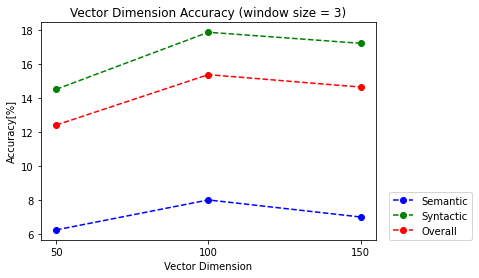

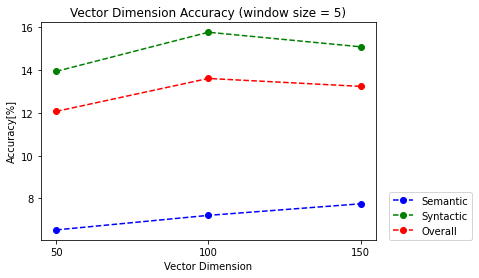

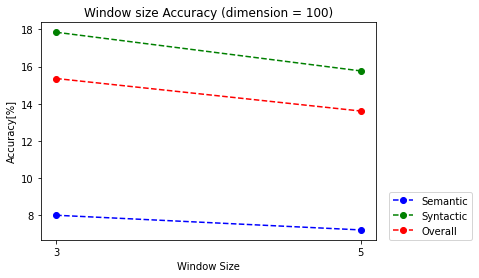

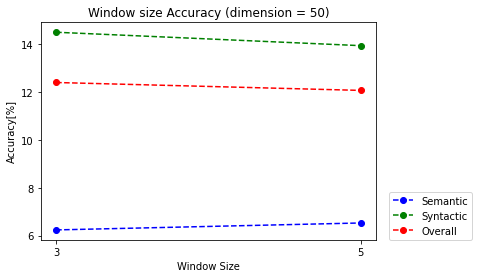

In [ ]:
# file1="/content/sg_model_1.txt"
# file2="/content/sg_model_2.txt"
file3="/content/sg_model_3.txt"
# file4="/content/sg_model_4.txt"
# file5="/content/sg_model_5.txt"
# file6="/content/sg_model_6.txt"

# vocab1, W_norm1 = normalize(file1)
# vocab2, W_norm2 = normalize(file2)
vocab3, W_norm3 = normalize(file3)
# vocab4, W_norm4 = normalize(file4)
# vocab5, W_norm5 = normalize(file5)
# vocab6, W_norm6 = normalize(file6)

# correct_sem1, correct_syn1, correct_tot1, count_sem1, count_syn1, count_tot1, full_count1 = evaluate_vectors(W_norm1, vocab1, prefix='/content/GloVe/eval/question-data')
# semantic_acc1 = correct_sem1 / float(count_sem1)
# sytactic_acc1 = correct_syn1 / float(count_syn1)
# total_acc1 = correct_tot1 / float(count_tot1)

# correct_sem2, correct_syn2, correct_tot2, count_sem2, count_syn2, count_tot2, full_count2 = evaluate_vectors(W_norm2, vocab2, prefix='/content/GloVe/eval/question-data')
# semantic_acc2 = correct_sem2 / float(count_sem2)
# sytactic_acc2 = correct_syn2 / float(count_syn2)
# total_acc2 = correct_tot2 / float(count_tot2)

correct_sem3, correct_syn3, correct_tot3, count_sem3, count_syn3, count_tot3, full_count3 = evaluate_vectors(W_norm3, vocab3, prefix='/content/GloVe/eval/question-data')
semantic_acc3 = correct_sem3 / float(count_sem3)
sytactic_acc3 = correct_syn3 / float(count_syn3)
total_acc3 = correct_tot3 / float(count_tot3)

# correct_sem4, correct_syn4, correct_tot4, count_sem4, count_syn4, count_tot4, full_count4 = evaluate_vectors(W_norm4, vocab4, prefix='/content/GloVe/eval/question-data')
# semantic_acc4 = correct_sem4 / float(count_sem4)
# sytactic_acc4 = correct_syn4 / float(count_syn4)
# total_acc4 = correct_tot4 / float(count_tot4)

# correct_sem5, correct_syn5, correct_tot5, count_sem5, count_syn5, count_tot5, full_count5 = evaluate_vectors(W_norm5, vocab5, prefix='/content/GloVe/eval/question-data')
# semantic_acc5 = correct_sem5 / float(count_sem5)
# sytactic_acc5 = correct_syn5 / float(count_syn5)
# total_acc5 = correct_tot5 / float(count_tot5)

# correct_sem6, correct_syn6, correct_tot6, count_sem6, count_syn6, count_tot6, full_count6 = evaluate_vectors(W_norm6, vocab6, prefix='/content/GloVe/eval/question-data')
# semantic_acc6 = correct_sem6 / float(count_sem6)
# sytactic_acc6 = correct_syn6 / float(count_syn6)
# total_acc6 = correct_tot6 / float(count_tot6)


from prettytable import PrettyTable
from matplotlib import pyplot as plt
# Table
x = PrettyTable()
x.field_names = ["Model", "Dimension", "Window Size", "Semantic accuracy", "Sytactic accuracy", "Total accuracy"]

#spaCy does not provide the fake ROOT token so add a row for the fake Root
x.add_row(["Skip-Gram", 50, 3, str(6.24)+'%', str(14.5)+'%', str(12.4)+'%'])
x.add_row(["Skip-Gram", 50, 5, str(6.53)+'%', str(13.94)+'%',str(12.07)+'%'])
x.add_row(["Skip-Gram", 100, 3, str(8.00)+'%', str(17.85)+'%', str(15.36)+'%'])
x.add_row(["Skip-Gram", 100, 5, str(7.21)+'%', str(15.77)+'%', str(13.61)+'%'])
x.add_row(["Skip-Gram", 150, 3, str(7.00)+'%', str(17.20)+'%', str(14.63)+'%'])
x.add_row(["Skip-Gram", 150, 5, str(7.75)+'%', str(15.09)+'%', str(13.24)+'%'])

    
print("4.1. Evaluation for different word embeddings")
print(x)

# Graph
plt.plot([50, 100, 150],[6.24 ,8.00, 7.00], '--bo',label='Semantic')
plt.plot([50, 100, 150],[14.5, 17.85, 17.20],'--go',label='Syntactic')
plt.plot([50, 100, 150],[12.4,15.36,14.63],'--ro',label='Overall')
plt.legend(loc=(1.04,0))
plt.xticks([50,100,150])
plt.title('Vector Dimension Accuracy (window size = 3)')
plt.xlabel('Vector Dimension')
plt.ylabel('Accuracy[%]')
plt.show()
print()
plt.plot([50, 100, 150],[6.53,7.21,7.75], '--bo',label='Semantic')
plt.plot([50, 100, 150],[13.94, 15.77,15.09],'--go',label='Syntactic')
plt.plot([50, 100, 150],[12.07,13.61,13.24],'--ro',label='Overall')
plt.legend(loc=(1.04,0))
plt.xticks([50,100,150])
plt.title('Vector Dimension Accuracy (window size = 5)')
plt.xlabel('Vector Dimension')
plt.ylabel('Accuracy[%]')
plt.show()
print()
plt.plot([3,5],[8.0,7.21], '--bo',label='Semantic')
plt.plot([3,5],[17.85, 15.77],'--go',label='Syntactic')
plt.plot([3,5],[15.36,13.61],'--ro',label='Overall')
plt.legend(loc=(1.04,0))
plt.xticks([3,5])
plt.title('Window size Accuracy (dimension = 100)')
plt.xlabel('Window Size')
plt.ylabel('Accuracy[%]')
plt.show()
print()
plt.plot([3,5],[6.24,6.53], '--bo',label='Semantic')
plt.plot([3,5],[14.5, 13.94],'--go',label='Syntactic')
plt.plot([3,5],[12.4,12.07],'--ro',label='Overall')
plt.legend(loc=(1.04,0))
plt.xticks([3,5])
plt.title('Window size Accuracy (dimension = 50)')
plt.xlabel('Window Size')
plt.ylabel('Accuracy[%]')
plt.show()

* As shown in the table and graph, when dimension = 100 and window size = 3,  accuracy is highest in terms of semantic and syntactic aspects, which are 8% and 17.5%. The reasons why this result is as follows.
 1. For window size, the result is that 3 is better than 5, and mainly because 
the smaller the window size, the higher the probability of finding synonyms for this dataset.
 2. For the dimension, the result of 100 outperformed other dimension numbers, since 50 is too small to represent all information of sentences. 150 maybe capture some information that is not common or generic. So when dimension equals 100, the accuracy is highest.
 3. So, the best parameter is that window_size = 3 and dimension = 100.

## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


The best pre-processing combination is that removing URL, punctuation, stopwords, and lemmatization(F1 score is 0.76).

In [ ]:
# Pre-processing
## Without URL and with URL
### remove URL, punctuation and stopwords
# remove_URL_punc_stop_training = remove_stopwords(remove_punctuation(remove_URL(training_posts)))
# remove_URL_punc_stop_testing = remove_stopwords(remove_punctuation(remove_URL(testing_posts)))
# remove_URL_punc_stop_data = remove_URL_punc_stop_training + remove_URL_punc_stop_testing 
# ### remove punctuation and stopwords without removing URL
# remove_punc_stop_training = remove_stopwords(remove_punctuation(training_posts))
# remove_punc_stop_testing = remove_stopwords(remove_punctuation(testing_posts))
# remove_punc_stop_data = remove_punc_stop_training + remove_punc_stop_testing 

# ## Two pre-processing combination
# ### remove URL, punctuation and stopwords
# remove_URL_punc_stop_training = remove_stopwords(remove_punctuation(remove_URL(training_posts)))
# remove_URL_punc_stop_testing = remove_stopwords(remove_punctuation(remove_URL(testing_posts)))
# remove_URL_punc_stop_data = remove_URL_punc_stop_training + remove_URL_punc_stop_testing 
# ### remove URL, stopwords, punctuation and lemmatization
# all_clean_training = lemmatization(remove_URL_punc_stop_training)
# all_clean_testing = lemmatization(remove_URL_punc_stop_testing)
# all_clean_data = all_clean_training + all_clean_testing


# Word Embedding
## word list and word index
# word_list1 = wordlist(remove_URL_punc_stop_training, remove_URL_punc_stop_testing)
# word_index1 = wordindex(word_list1)
# vocab_size1 = len(word_list1)

# word_list2 = wordlist(remove_punc_stop_training, remove_punc_stop_testing)
# word_index2 = wordindex(word_list2)
# vocab_size2 = len(word_list2)

word_list3 = wordlist(clean_training, clean_testing)
word_index3 = wordindex(word_list3)
vocab_size3 = len(word_list3)

## Encoded and add padding
seq_length = 800
# training_encoded1 = encode_and_add_padding(remove_URL_punc_stop_training, seq_length, word_index1)
# testing_encoded1 = encode_and_add_padding(remove_URL_punc_stop_testing, seq_length, word_index1)

# training_encoded2 = encode_and_add_padding(remove_punc_stop_training, seq_length, word_index2)
# testing_encoded2 = encode_and_add_padding(remove_punc_stop_testing, seq_length, word_index2)

training_encoded3 = encode_and_add_padding(clean_training, seq_length, word_index3)
testing_encoded3 = encode_and_add_padding(clean_testing, seq_length, word_index3)

## Embedding table
# pre_emb_table1 = pretrained_emb_table(word_list1, pre_emb_model_twitter)
# pre_emb_table2 = pretrained_emb_table(word_list2, pre_emb_model_twitter)
pre_emb_table3 = pretrained_emb_table(word_list3, pre_emb_model_twitter)


# Dataloader
batch_size = 256
# train_loader1 = Data_loader(training_encoded1)
# train_loader2 = Data_loader(training_encoded2)
train_loader3 = Data_loader(training_encoded3)

In [ ]:
# Bi-LSTM with lemmatization
model3, criterion3, optimizer3 = LSTM_define_model_loss_optimizer(vocab_size3, pre_emb_table3, 100)
print(LSTM_train(model3, train_loader3, num_epochs, criterion3, optimizer3))
print(LSTM_test(model3,testing_encoded3))

Epoch: 1, loss: 0.68520, train_acc: 0.55
Epoch: 2, loss: 0.65794, train_acc: 0.60
Epoch: 3, loss: 0.63626, train_acc: 0.64
Epoch: 4, loss: 0.61366, train_acc: 0.66
Epoch: 5, loss: 0.55786, train_acc: 0.72
Epoch: 6, loss: 0.45271, train_acc: 0.79
Epoch: 7, loss: 0.37704, train_acc: 0.84
Epoch: 8, loss: 0.31449, train_acc: 0.87
Epoch: 9, loss: 0.26637, train_acc: 0.89
Epoch: 10, loss: 0.22264, train_acc: 0.91
Finished Training

Starting testing
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       467
           1       0.75      0.73      0.74       400

    accuracy                           0.76       867
   macro avg       0.76      0.76      0.76       867
weighted avg       0.76      0.76      0.76       867



In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "macro F1", "weighted F1"]

x.add_row(["Bi-LSTM with URL", 0.73, 0.73])
x.add_row(["Bi-LSTM without URL", 0.76, 0.76])
x.add_row(["Bi-LSTM with removing punctuation,stopwords(without lemmatization)", 0.75, 0.75])
x.add_row(["Bi-LSTM with removing punctuation, stopwords, and lemmatization", 0.76, 0.76])

    
print("4.2. Evaluation for different data pre-processing techniques")
print(x)

4.2. Evaluation for different data pre-processing techniques
+--------------------------------------------------------------------+----------+-------------+
|                               Model                                | macro F1 | weighted F1 |
+--------------------------------------------------------------------+----------+-------------+
|                          Bi-LSTM with URL                          |   0.73   |     0.73    |
|                        Bi-LSTM without URL                         |   0.76   |     0.76    |
| Bi-LSTM with removing punctuation,stopwords(without lemmatization) |   0.75   |     0.75    |
|  Bi-LSTM with removing punctuation, stopwords, and lemmatization   |   0.76   |     0.76    |
+--------------------------------------------------------------------+----------+-------------+


* The best pre-processing combination contains removing URL, punctuation, stopwords, and lemmatization(F1 score is 0.82).
  1. As seen in table above, both macro and weighted F1 scores of Bi-LSTM without URL(0.76) are greater than Bi-LSTM with URL(0.73). F1 scores of Bi-LSTM with lemmatization are a little better than that of Bi-LSTM wihout lemmatization, although the difference between them is very very small. So the best combination for pre-processing is that the model without URL and with lemmatization, meaning the best model is removing URL, punctuation, stopwords, and lemmatization. 
  2. The reason is that URL has no any semantic meaning  and removing them maybe will help us to better train the model. Also, lemmatization means converting each word into its base from considering its context, for example,  corpora-->corpus and better-->good. It greatly reduces our vocabulary, meaning we don't need large space for storage, and it avoids losing as much information as possibleso, so it is helpful  to find words in a dictionary. Stopwords were used because the amount of information carried by these words is extremely limited. Punctuation is also meaningless in a sentence.
  3. So I used removing URL, punctuation, stopwords, and lemmatization these techiniques in the section 1.

## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


The best input is the concatenation of Skip-gram and glove-twitter-100(F1 score is 0.82).

In [ ]:
# two word vectors training models.
# cb_model1 = Word2Vec(sentences = data, size = 100, window = 3, min_count= 1, workers=2, sg=0)
# sg_model1= Word2Vec(sentences = data, size = 100, window = 3, min_count= 1, workers=2, sg=1)
# train_emb_table1 = trained_emb_table(word_list, cb_model1)
# train_emb_table2 = trained_emb_table(word_list, sg_model1)

# two pretrained embeddings (from gensim)
# pre_emb_model_wiki = api.load('glove-wiki-gigaword-100')
# emb_dim_wiki = pre_emb_model_wiki.vector_size
# pre_emb_model_twitter = api.load('glove-twitter-100')
# emb_dim_twitter = pre_emb_model_twitter.vector_size

# pre_emb_table1 = pretrained_emb_table(word_list, pre_emb_model_wiki)
# pre_emb_table2 = pretrained_emb_table(word_list, pre_emb_model_twitter)

# four input concatenation
con_emb_tabel1 = concatenation(word_list, pre_emb_model_twitter, sg_model)
# con_emb_tabel3 = concatenation(word_list, pre_emb_model_wiki , sg_model1) 


In [ ]:
# Bi-LSTM with word2vec-SG + glove-twitter-100
model, criterion, optimizer = LSTM_define_model_loss_optimizer(vocab_size, con_emb_tabel1, 200)
print(LSTM_train(model, train_loader, num_epochs, criterion, optimizer))
print(LSTM_test(model,testing_encoded))

Epoch: 1, loss: 0.68061, train_acc: 0.56
Epoch: 2, loss: 0.67329, train_acc: 0.58
Epoch: 3, loss: 0.64456, train_acc: 0.62
Epoch: 4, loss: 0.64785, train_acc: 0.62
Epoch: 5, loss: 0.55501, train_acc: 0.70
Epoch: 6, loss: 0.48850, train_acc: 0.76
Epoch: 7, loss: 0.36481, train_acc: 0.84
Epoch: 8, loss: 0.31533, train_acc: 0.87
Epoch: 9, loss: 0.27279, train_acc: 0.89
Epoch: 10, loss: 0.24157, train_acc: 0.90
Finished Training

Starting testing
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       467
           1       0.81      0.80      0.81       400

    accuracy                           0.82       867
   macro avg       0.82      0.82      0.82       867
weighted avg       0.82      0.82      0.82       867



In [ ]:
from prettytable import PrettyTable

embedding_table = PrettyTable()
embedding_table.field_names = ["Model", "macro F1", "weighted F1"]

#spaCy does not provide the fake ROOT token so add a row for the fake Root
embedding_table.add_row(["Bi-LSTM with Word2vec (CBOW)", 0.61, 0.62])
embedding_table.add_row(["Bi-LSTM with Word2vec (SG)", 0.82, 0.82])
embedding_table.add_row(["Bi-LSTM with glove-wiki-gigaword-100", 0.63, 0.64])
embedding_table.add_row(["Bi-LSTM with glove-twitter-100", 0.70, 0.70])
embedding_table.add_row(["Bi-LSTM with word2vec-SG + glove-wiki-gigaword-100", 0.81, 0.81])
embedding_table.add_row(["Bi-LSTM with word2vec-SG + glove-twitter-100", 0.82, 0.82])

print("4.3. Evaluation for different input(embedding)")
print(embedding_table)

4.3. Evaluation for different input(embedding)
+----------------------------------------------------+----------+-------------+
|                       Model                        | macro F1 | weighted F1 |
+----------------------------------------------------+----------+-------------+
|            Bi-LSTM with Word2vec (CBOW)            |   0.61   |     0.62    |
|             Bi-LSTM with Word2vec (SG)             |   0.82   |     0.82    |
|        Bi-LSTM with glove-wiki-gigaword-100        |   0.63   |     0.64    |
|           Bi-LSTM with glove-twitter-100           |   0.7    |     0.7     |
| Bi-LSTM with word2vec-SG + glove-wiki-gigaword-100 |   0.81   |     0.81    |
|    Bi-LSTM with word2vec-SG + glove-twitter-100    |   0.82   |     0.82    |
+----------------------------------------------------+----------+-------------+


* The best input is the concatenation of Skip-gram and glove-twitter-100(F1 score is 0.82)
  1. As shown in table above, for the word vectors training models, SG model(61%) performs better than CBOW(82%), the reason for this trend is that Skip-gram relies on a single word input and it is less sensitive to overfitting of frequent words because even though frequent words occur more often than rare words during training, they still occur individually, whereas CBOW is prone to overfitting frequent words because they occur multiple times in the same context. This advantage of overfitting to frequent words makes Skip-gram peforms better than CBOW.
  2. For the pretrained model, I compared glove-wiki-gigaword-100 and glove-twitter-100. The result shows that the latter one(0.7) is better than the former(0.63). I guess the reason is that Wikipedia and Twitter are two different web platforms. The corpora of Twitter maybe more suitable for this dataset.
  3. For the concatenation model, the F1 score of them is almost the same, at 0.81 and 0.82 respectively, since the training model of both concatenation is Skip-Gram, maybe its role is more important compared to the pretrained model.
  * The training model SG and the concatenation model(SG+glove-twitter-100 ) performed equally well, both at 0.82. So I just choose the concatnation model as the best embedding(input) from the two different embeddings.

## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


The best sequence model is Bi-LSTM, which get the F1 score of 0.8.

In [ ]:
|# RNN
RNN_model, RNN_criterion, RNN_optimizer = RNN_define_model_loss_optimizer(vocab_size, emb_table, 200)
print(RNN_train(RNN_model, train_loader, num_epochs, RNN_criterion, RNN_optimizer,10))
print(RNN_test(RNN_model,testing_encoded))

Epoch: 1, loss: 0.69850, train_acc: 0.53
Epoch: 2, loss: 0.67780, train_acc: 0.57
Epoch: 3, loss: 0.67454, train_acc: 0.58
Epoch: 4, loss: 0.65932, train_acc: 0.60
Epoch: 5, loss: 0.63945, train_acc: 0.63
Epoch: 6, loss: 0.62151, train_acc: 0.65
Epoch: 7, loss: 0.60012, train_acc: 0.68
Epoch: 8, loss: 0.58695, train_acc: 0.68
Epoch: 9, loss: 0.56279, train_acc: 0.71
Epoch: 10, loss: 0.54300, train_acc: 0.72
Finished Training
              precision    recall  f1-score   support

           0       0.57      0.58      0.58       467
           1       0.50      0.49      0.49       400

    accuracy                           0.54       867
   macro avg       0.54      0.54      0.54       867
weighted avg       0.54      0.54      0.54       867



In [ ]:
# LSTM
LSTM_model, LSTM_criterion, LSTM_optimizer = LSTM_define_model_loss_optimizer(vocab_size, emb_table, 200)
print(LSTM_train(LSTM_model, train_loader, num_epochs, LSTM_criterion, LSTM_optimizer))
print(LSTM_test(LSTM_model,testing_encoded))

Epoch: 1, loss: 0.68775, train_acc: 0.54
Epoch: 2, loss: 0.65545, train_acc: 0.61
Epoch: 3, loss: 0.65687, train_acc: 0.61
Epoch: 4, loss: 0.62514, train_acc: 0.66
Epoch: 5, loss: 0.59163, train_acc: 0.69
Epoch: 6, loss: 0.43678, train_acc: 0.81
Epoch: 7, loss: 0.35729, train_acc: 0.85
Epoch: 8, loss: 0.30031, train_acc: 0.88
Epoch: 9, loss: 0.26121, train_acc: 0.90
Epoch: 10, loss: 0.22974, train_acc: 0.91
Finished Training

Starting testing
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       467
           1       0.80      0.77      0.78       400

    accuracy                           0.81       867
   macro avg       0.80      0.80      0.80       867
weighted avg       0.80      0.81      0.80       867



In [ ]:
from prettytable import PrettyTable

embedding_table = PrettyTable()
embedding_table.field_names = ["Model", "macro F1", "weighted F1"]

#spaCy does not provide the fake ROOT token so add a row for the fake Root
embedding_table.add_row(["Bi-RNN", 0.54, 0.54])
embedding_table.add_row(["Bi-LSTM", 0.8, 0.8])

print("4.4. Evaluation for different sequence models")
print(embedding_table)

4.4. Evaluation for different sequence models
+---------+----------+-------------+
|  Model  | macro F1 | weighted F1 |
+---------+----------+-------------+
|  Bi-RNN |   0.54   |     0.54    |
| Bi-LSTM |   0.8    |     0.8     |
+---------+----------+-------------+


* It can be seen from the table above that Bi-LSTM is the best model and the F1 score of Bi-LSTM(0.8) is much better than Bi-RNN(0.54). There are several reasons for this trend.
  1. Bi-LSTM is an improved type of Bi-RNN. It contains a ‘memory cell’ that  lets them learn longer-term dependencies , which meaning Bi-LSTM can maintain information in memory for long periods of time, this cannot be finished by Bi-RNN due to vanishing and exploding gradients.
  2. Bi-LSTM can address gradient vanishing and exploding by introducing new gates, such as input and forget gates, which allow for better control of the gradient flow and better preservation of 'long-term dependencies' as well as 'short-term dependencies'.
  3. So the performance of Bi-LSTM is better than that of Bi-RNN.









## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


Based on a learning rate of 0.01 and epoch of 10, the model earned the highest F1 score, at about 0.82.

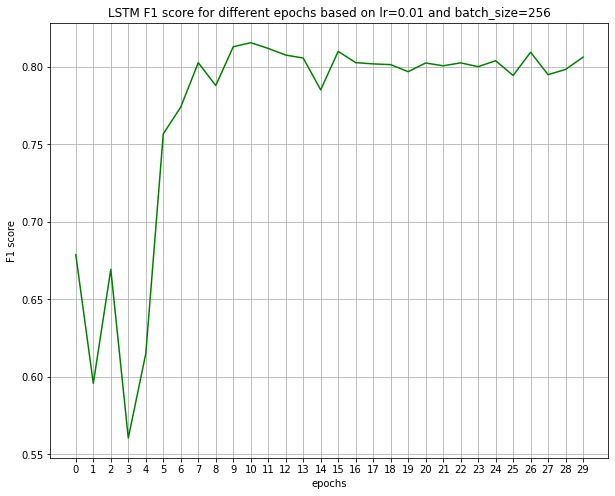

In [ ]:
def LSTM_train_test(model, testing_encoded,optimizer,criterion, num_epochs):
  epoch_ls = []
  f1_ls = []
  for epoch in range(num_epochs):  
    # Set the flag to training
      epoch_ls.append(epoch)
      model.train()
      train_loss = []
      train_correct = 0
      for data, label in train_loader:
          data = data.to(device)
          label = label.to(device)
          # forward + backward + loss + optimize
          optimizer.zero_grad()
          outputs = model(data) 
          predicted = torch.argmax(outputs, -1)
          loss = criterion(outputs, label) #128个样本的平均
          loss.backward()
          optimizer.step()
       
      model.eval()
      input_torch = torch.from_numpy(np.array(testing_encoded)).to(device)
      outputs = model(input_torch) 
      predicted = torch.argmax(outputs, -1)
      f1 = f1_score(predicted.cpu().numpy(),label_test_encoded.cpu
      ().numpy(),average = "weighted")
      f1_ls.append(f1)
  plt.figure(figsize=(20,8))
  plt.plot(epoch_ls, f1_ls, color='green')  
  plt.grid() 
  plt.xlabel('epochs')  
  plt.ylabel('F1 score') 
  plt.xticks(epoch_ls) 
  plt.title("LSTM F1 score for different epochs based on lr=0.001 and batch_size=256") 
  plt.show() 


# learning rate = 0.1
model,criterion, optimizer =  LSTM_define_model_loss_optimizer(vocab_size, emb_table, 200)
LSTM_train_test(model,testing_encoded,optimizer,criterion,30)

In [ ]:
## learning rate = 0.01
# model,criterion, optimizer =  LSTM_define_model_loss_optimizer(vocab_size, emb_table, 200)
# LSTM_train_test(model,testing_encoded,optimizer,criterion,100)

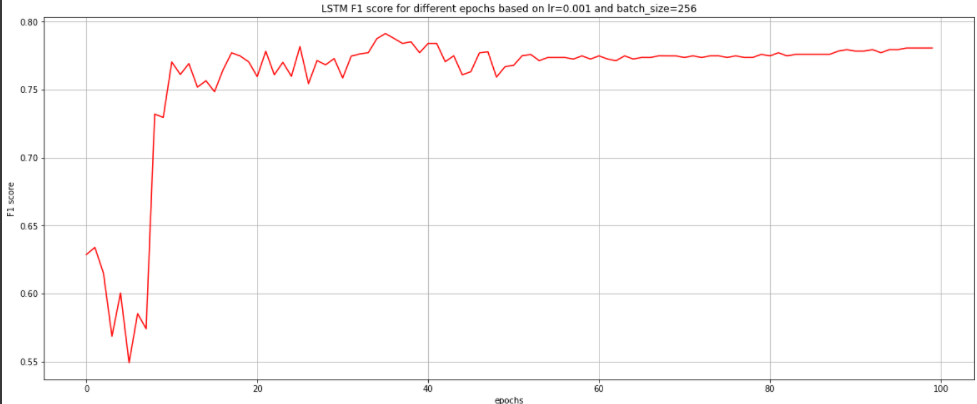

* Based on learning rate of 0.01 and epoch of 10, the model earned the highest F1 score,about 0.82.
  1.  When the learning rate is 0.01, the model performs best at an epoch of 10, around 0.82, meanwhile, the F1 score almost remained almost constant when the epoch is more than 10, about 0.80. 
  2. For learning rate equal to 0.001，F1 score is highest(less than 0.8) when epoch is about 35. Also the performance(about 0.77) is almost unchanged when epoch is greater than 40.  
  *  Therefore, the higher the learning rate, the smaller the number of iterations. when the learning rate is equal to 0.01, the training of models would spend less iteration to achieve the best compared to the learning rate of 0.001. Also, its best f1 score is greater than the best f1 score for a 0.001 learning rate. In this way, I choose epoch 10 as the best epoch because the F1 score got about 0.82 based on 0.01 learning rate.

#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [34]:
#@title Personality Type Prediction

## The code below will take about 20 seconds
import warnings
import torch
import torch.nn as nn
import numpy as np
warnings.filterwarnings("ignore")
import re
import nltk
import pickle
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



id2 = '1qBBS_0dQo_797pd-jHTDH4Gq4dEYh-ue'
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('word_index.pkl') 
f = open('/content/word_index.pkl','rb')
word_index = pickle.load(f)

# #id = '1zMkRGqwQa0vJlw4ma_vBuDyqJ6N88CDr' # assignment1
id1 = '1HCY7R4gIXIKfolZPhZEjuEoyUruBUsha'
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('best_model.pt') 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Model structure
class Bi_LSTM_Emb(nn.Module):
    def __init__(self, vocab_size, emb_table, emb_size):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_size)

        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_size, n_hidden,batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):

        x = self.emb(x)        
        lstm_out, (h_n, c_n) = self.lstm(x)
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

print("------------------------------------")
text = "I  do not care about anything" #@param {type:"string"}
print(text)
print()

# Text pre-processing
clean_text1 =  re.sub(r'\S*https?:\S*', '', text)
clean_text2 = re.sub(r'[^\w\s]','', clean_text1)

tokens = word_tokenize(clean_text2)
stop_words = stopwords.words('english')
filtered_sentence = [w.lower() for w in tokens if not w in stop_words]

lemmatizer = WordNetLemmatizer()
clean_text = [lemmatizer.lemmatize(w) for w in filtered_sentence]

# Text encoded
seq_len = 800
index_encoded_text = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in clean_text]
if len(index_encoded_text) < seq_len:
    index_encoded_text += [word_index['[PAD]']] * (seq_len - len(index_encoded_text))
else:
    index_encoded_text = index_encoded_text[:seq_len]

# Load model
model = torch.load('best_model.pt')

# Test the model
model.eval()
input_torch = torch.from_numpy(np.array([index_encoded_text])).to(device)
outputs = model(input_torch) 
predicted = torch.argmax(outputs, -1)
if predicted == 1:
  print('Predicted Personality Type: T')
else:
  print('Predicted Personality Type: F')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
------------------------------------
I  do not care about anything

Predicted Personality Type: F


# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed* 

In [ ]:
# If you used OOP style, use this section